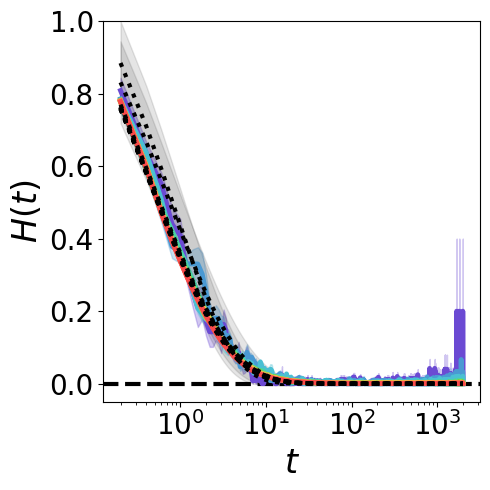

In [1]:

import os, glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

base_dir = "./" 
os.chdir(base_dir)


def kww(t, A, tauH, betaH):
    return A * np.exp(-(t / tauH)**betaH)

def kww_error(t, A, tauH, betaH, sigma_A, sigma_tauH, sigma_betaH):
    exp_term = np.exp(-(t / tauH)**betaH)
    common = (t / tauH)**betaH

    df_dA = exp_term
    df_dtau = A * exp_term * betaH * common / tauH
    df_dbeta = -A * exp_term * common * np.log(t / tauH)

    sigma_f = np.sqrt((df_dA * sigma_A)**2 +
                      (df_dtau * sigma_tauH)**2 +
                      (df_dbeta * sigma_betaH)**2)
    return sigma_f

D_files = sorted(glob.glob("Ht_MD_1_WCA_*.csv"))
fit_params = pd.read_csv("htfit_params_MD_1_WCA.csv")

r_values = fit_params["r_value"].tolist() if "r_value" in fit_params.columns else \
           [float(name.split("_")[-1].replace(".csv","")) for name in D_files]

colors_hex = [
    '#6b4ad3', '#4a99d3', '#4ac0d3', '#4ad3a3', '#70d34a',
    '#b3d34a', '#e9c84a', '#f9ae4a', '#f98c4a', '#f96a4a', '#f94a4a'
]


fig, ax = plt.subplots(figsize=(5,5))


ax.set_xscale("log")
ax.set_ylim(-0.05, 1)
plt.axhline(y=0, color="black", linestyle="--", linewidth=3)

from matplotlib.ticker import NullFormatter
ax.xaxis.set_minor_formatter(NullFormatter())
ax.yaxis.set_minor_formatter(NullFormatter())

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$t$', fontsize=24)
ax.set_ylabel(r'$H(t)$', fontsize=24)

for i, (r_value, color) in enumerate(zip(r_values, colors_hex)):
    file = f"Ht_MD_1_WCA_{r_value}.csv"
    data = pd.read_csv(file)

    x = np.array(data["timestep"])
    y = np.array(data["H(t)_mean"])
    yerr = data["H(t)_err"]

    params = fit_params.iloc[i]
    avg_A = params["A_fit"]
    avg_tauH = params["tauH_fit"]
    avg_betaH = params["betaH_fit"]
    err_avg_A = params["A_err"]
    err_avg_tauH = params["tauH_err"]
    err_avg_betaH = params["betaH_err"]

    ax.plot(x, y, linestyle="-", color=color, linewidth=3.5)
    ax.fill_between(x, y - yerr, y + yerr, color=color, alpha=0.3)

    y_fit = kww(x, avg_A, avg_tauH, avg_betaH)
    y_fit_error = kww_error(x, avg_A, avg_tauH, avg_betaH, err_avg_A, err_avg_tauH, err_avg_betaH)
    plt.plot(x, y_fit, linestyle=":", color="black", linewidth=3, zorder=3)
    plt.fill_between(x, y_fit-y_fit_error, y_fit+y_fit_error, color = "black", alpha=0.1)
        

plt.tight_layout()
plt.show()

